# Synthetic Datasets

### 1. Imports and Setup

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
def make_circular_blobs(n_points: int, n_classes: int, R: int = 5, r: int = 1, random_state=None):
    rng = np.random.default_rng(random_state)

    thetas = np.linspace(0, 2*np.pi, n_classes, endpoint=False)
    centers = np.c_[R * np.cos(thetas), R * np.sin(thetas)]

    points_per_class = n_points // n_classes
    X, y = [], []

    for i, c in enumerate(centers):
        rho = r * np.sqrt(rng.random(points_per_class))
        phi = 2 * np.pi * rng.random(points_per_class)
        xs = rho * np.cos(phi) + c[0]
        ys = rho * np.sin(phi) + c[1]
        pts = np.c_[xs, ys]
        X.append(pts)
        y.extend([i] * points_per_class)

    X = np.vstack(X)
    y = np.array(y)
    return X, y

In [19]:
def generate_and_save_dataset(output_path: str, filename: str, n_points: int, n_classes: int, R: int, r: int, random_state=42):
  X, y = make_circular_blobs(n_points, n_classes, R, r, random_state)

  df = pd.DataFrame(X, columns=["X", "Y"])
  df["class"] = y
  df.to_csv(output_path+filename+'.csv', index=False)
  
  sns.scatterplot(data=df, x="X", y="Y", hue="class", s=40)
  plt.gca().set_aspect("equal")
  plt.title(output_path+filename)
  plt.savefig(output_path+filename+'.png')
  plt.close()
  print("Done!")

  

### 2. Generator

In [ ]:
generate_and_save_dataset(output_path="synthetic_data/three_classes/", filename="test1", n_points=2250, n_classes=3, R=240, r=200, random_state=42)
generate_and_save_dataset(output_path="synthetic_data/three_classes/", filename="test2", n_points=2250, n_classes=3, R=180, r=200, random_state=42)
generate_and_save_dataset(output_path="synthetic_data/three_classes/", filename="test3", n_points=2250, n_classes=3, R=120, r=200, random_state=42)
generate_and_save_dataset(output_path="synthetic_data/three_classes/", filename="test4", n_points=2250, n_classes=3, R=0,   r=200, random_state=42)

Done!
Done!
Done!
Done!


In [42]:
generate_and_save_dataset(output_path="synthetic_data/five_classes/", filename="test1", n_points=3000, n_classes=5, R=360, r=200, random_state=42)
generate_and_save_dataset(output_path="synthetic_data/five_classes/", filename="test2", n_points=3000, n_classes=5, R=250, r=200, random_state=42)
generate_and_save_dataset(output_path="synthetic_data/five_classes/", filename="test3", n_points=3000, n_classes=5, R=170, r=200, random_state=42)
generate_and_save_dataset(output_path="synthetic_data/five_classes/", filename="test4", n_points=3000, n_classes=5, R=0,   r=200, random_state=42)

Done!
Done!
Done!
Done!


#### 2.1 Plots

In [51]:
def create_folder_plots(folder_path: str, num_datasets: int = 4):
  fig, axes = plt.subplots(1, 4, figsize=(20, 5), sharey=True)
  fig.suptitle(f'Scatter Plots of {folder_path}')
  
  for i in range(num_datasets):
    df = pd.read_csv(f"{folder_path}test{i+1}.csv")
    sns.scatterplot(ax=axes[i], data=df, x='X', y='Y', hue='class')
    axes[i].set_title(f'DataFrame {i+1}')
  
  plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent title overlap
  plt.show()

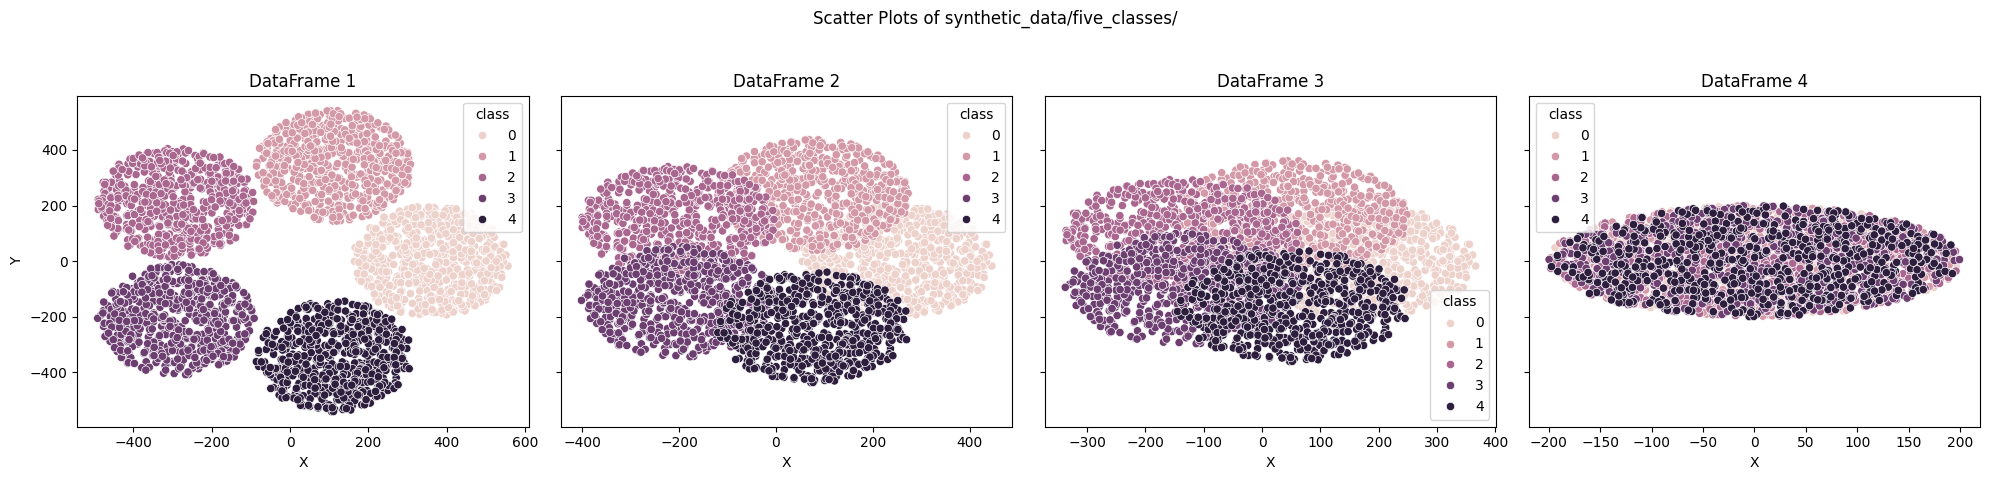

In [52]:
create_folder_plots("synthetic_data/five_classes/")

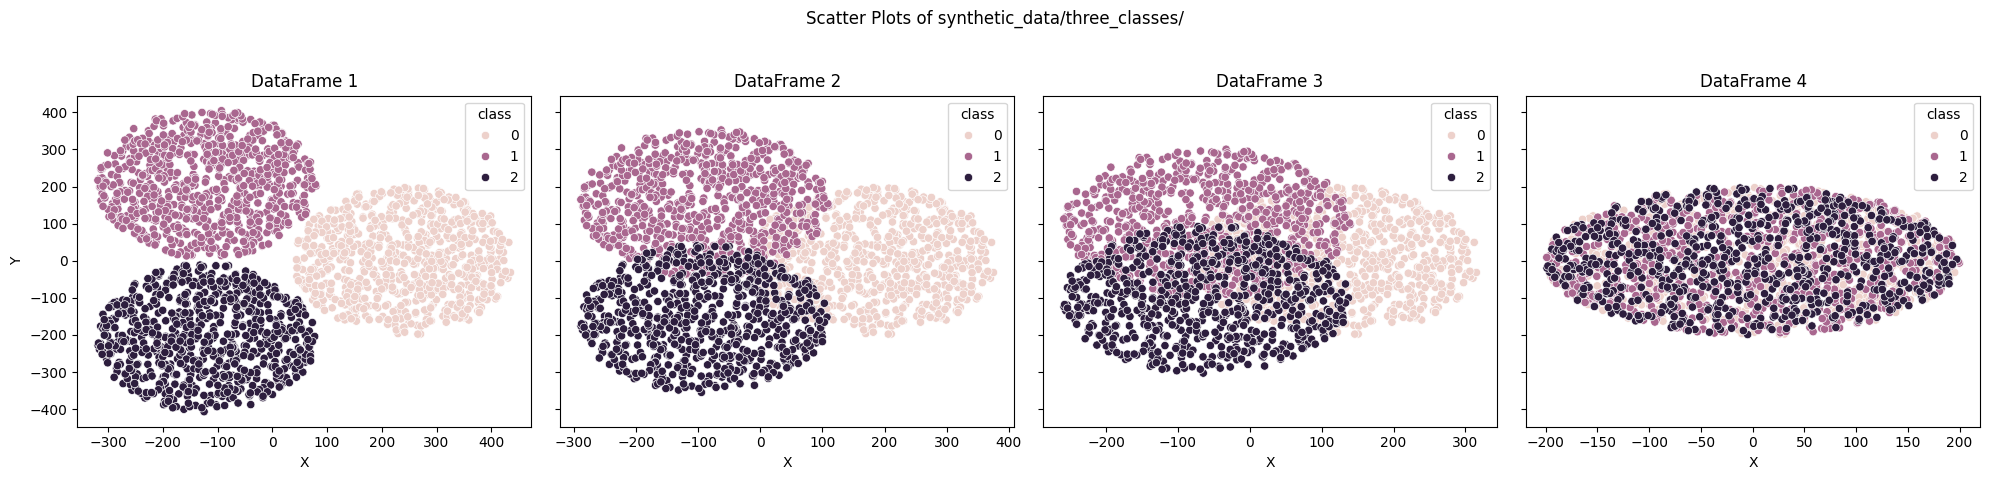

In [53]:
create_folder_plots("synthetic_data/three_classes/")

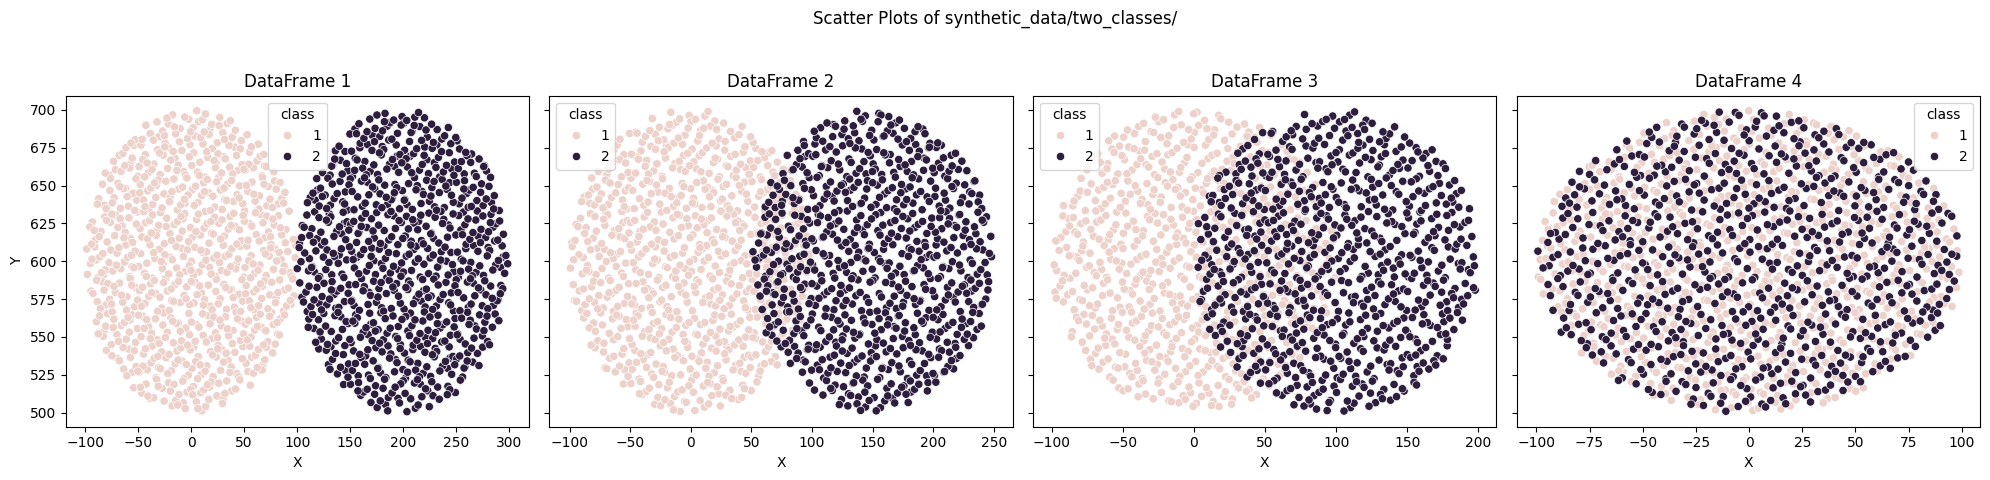

In [54]:
create_folder_plots("synthetic_data/two_classes/")